##Importing all the necessary Libraries

In [ ]:
# Imported Libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### About Dataset important Information

The first thing we must do is gather a basic sense of our data. Remember, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.



In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,...,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000
mean,13905.276259,-0.244970,0.258166,0.777804,0.291614,-0.146329,0.099878,-0.150970,0.012969,0.734707,...,-0.052197,-0.146256,-0.038504,0.014510,0.119974,0.036454,0.014558,0.007047,67.504000,0.004521
std,9867.916251,1.893161,1.508296,1.766872,1.479519,1.423917,1.327756,1.342027,1.318460,1.273597,...,0.826158,0.634077,0.526168,0.588938,0.438850,0.537046,0.397673,0.248679,189.184677,0.067087
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.687773,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3781.250000,-0.959806,-0.305367,0.338327,-0.629972,-0.729796,-0.651820,-0.599770,-0.175261,-0.102798,...,-0.262581,-0.556175,-0.173509,-0.330602,-0.140146,-0.345451,-0.071486,-0.011786,5.490000,0.000000
50%,12347.500000,-0.306803,0.235061,0.924255,0.230058,-0.192681,-0.169764,-0.076457,0.020846,0.726588,...,-0.119493,-0.118803,-0.046656,0.063623,0.158356,-0.030200,0.003094,0.018529,15.950000,0.000000
75%,23775.000000,1.164015,0.876538,1.557391,1.155770,0.347812,0.493661,0.447398,0.272076,1.480254,...,0.041561,0.250886,0.072758,0.398391,0.397765,0.342446,0.098968,0.077345,56.670000,0.000000
max,29031.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


When working with credit card fraud detection dataset,df.describe() provides a summary of statistics for each column, including count, mean, standard deviation, minimum, and maximum values, as well as percentiles

In [ ]:
# Good No Null Values!
df.isnull().sum().max()

1

The df.isnull().sum().max() expression is checking the maximum number of null (missing) values in any column of the DataFrame.

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.54 % of the dataset
Frauds 0.45 % of the dataset


print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

This line calculates the percentage of non-fraudulent transactions in the dataset.

df['Class'].value_counts()[0] counts the number of instances where the 'Class' is 0 (indicating a non-fraudulent transaction).
len(df) gives the total number of transactions in the dataset.
The result is then multiplied by 100 to get the percentage, and round(..., 2) is used to round the percentage to two decimal places before printing.

print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

This line does the same as the first line but for fraudulent transactions (where 'Class' is 1).
The purpose of these print statements is to highlight the class distribution in the dataset. In credit card fraud detection, it's common for fraudulent transactions to be a very small percentage of the overall transactions

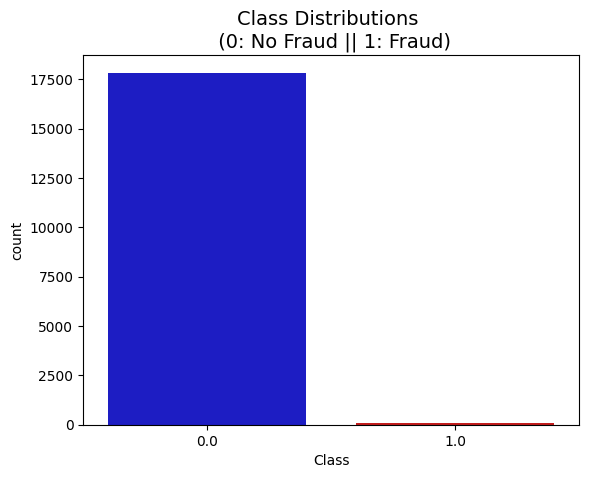

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features

(0.0, 29031.0)

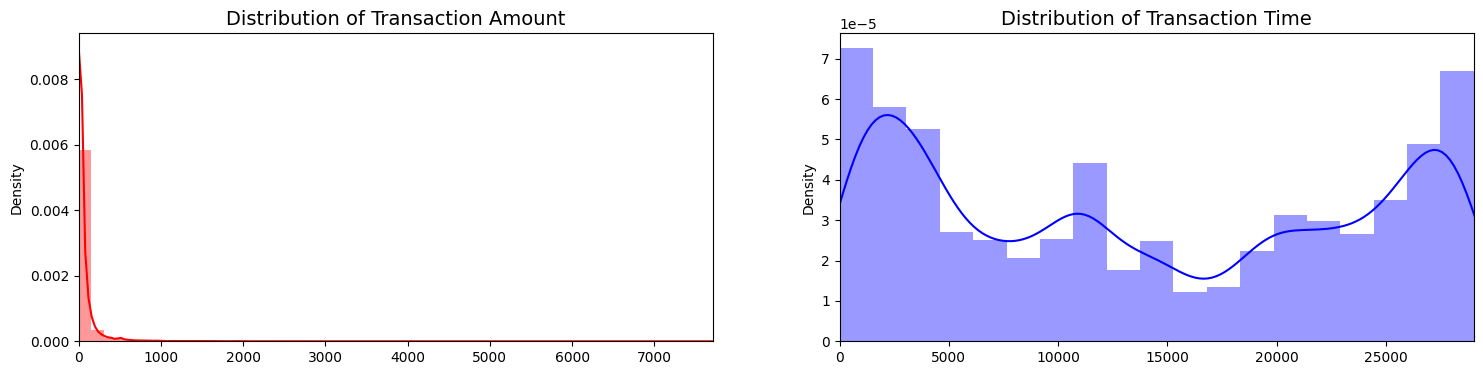

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

###First subplot (ax[0]):

It uses sns.distplot to create a distribution plot (histogram) for transaction amounts.
ax[0].set_title and ax[0].set_xlim set the title and x-axis limits for the first subplot.

####Second subplot (ax[1]):

It does the same as the first subplot but for transaction times.
ax[1].set_title and ax[1].set_xlim set the title and x-axis limits for the second subplot.

In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.611762,-0.617568,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.259086,-0.617568,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,7.086948,-0.617518,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,2.101407,-0.617518,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,1.055881,-0.617468,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


##Splitting the Data (Original DataFrame)

Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for my model to detect the patterns), and test it on the original testing set.

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Check for missing values in the 'Class' column
print("Missing values in 'Class' column:", df['Class'].isnull().sum())

# Drop rows with missing values in the 'Class' column
df = df.dropna(subset=['Class'])

# Print class distribution again
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

# Rest of your code...


Missing values in 'Class' column: 1
No Frauds 99.55 % of the dataset
Frauds 0.45 % of the dataset


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
# print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.55 % of the dataset
Frauds 0.45 % of the dataset
Train: [ 3570  3571  3572 ... 17914 17915 17916] Test: [   0    1    2 ... 6609 6641 6717]
Train: [    0     1     2 ... 17914 17915 17916] Test: [3570 3571 3572 ... 8842 8845 8972]
Train: [    0     1     2 ... 17914 17915 17916] Test: [ 7160  7161  7162 ... 10891 10897 11343]
Train: [    0     1     2 ... 17914 17915 17916] Test: [10747 10748 10749 ... 15204 15225 15451]
Train: [    0     1     2 ... 15204 15225 15451] Test: [14329 14330 14331 ... 17914 17915 17916]
Label Distributions: 

[0.99546533 0.00453467]
[0.99553447 0.00446553]


In this code snippet, the initial print statements provide an overview of the class distribution in a credit card fraud detection dataset. It then employs stratified k-fold cross-validation using StratifiedKFold to iteratively split the dataset into training and testing sets while preserving the proportion of fraudulent and non-fraudulent transactions. The loop extracts the indices for each fold and creates corresponding training and testing sets. The subsequent conversion of these sets to NumPy arrays suggests preparation for further processing or model training. Finally, the code analyzes and prints the distribution of labels in both the training and testing sets, ensuring that each fold maintains a similar distribution to avoid introducing bias during model evaluation. This approach aids in robustly training and assessing machine learning models for fraud detection tasks.







##Random Under-Sampling

In this phase we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
11303,-0.281165,0.365989,1.286487,0.280871,0.153509,0.591799,0.224668,-0.046484,-0.082087,-0.101420,...,-0.169622,-0.385208,-0.823626,0.022392,-0.829518,0.324720,0.217623,-0.048240,-0.003898,0.0
6472,-0.292106,-0.230447,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,...,0.204138,0.343283,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1.0
10050,3.290543,0.142870,-0.923243,0.573217,2.161913,1.957410,-1.407968,1.178613,0.578703,0.097284,...,-0.444854,-0.487486,-0.631295,0.151616,0.315994,-0.525743,-0.517490,-0.068432,0.102920,0.0
3312,-0.006448,-0.474423,1.243209,0.782239,0.088328,2.268250,0.582544,-0.224691,0.540685,-0.229471,...,-0.022613,-0.442794,-1.330991,0.059065,-0.480445,0.433620,-0.333743,-0.021684,0.019529,0.0
12667,-0.062524,0.492979,1.207328,-0.339833,0.921008,-0.704078,-0.937796,-0.263491,-0.766157,0.056676,...,-0.129463,-0.126686,0.066133,-0.086114,-0.035801,0.483218,-0.723226,0.059826,0.017219,0.0


The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)

Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.

After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

###Equally Distributing and Correlating:

Now that I have my dataframe correctly balanced, we can go further with our analysis and data preprocessing.

Distribution of the Classes in the subsample dataset
0.0    0.858639
1.0    0.141361
Name: Class, dtype: float64


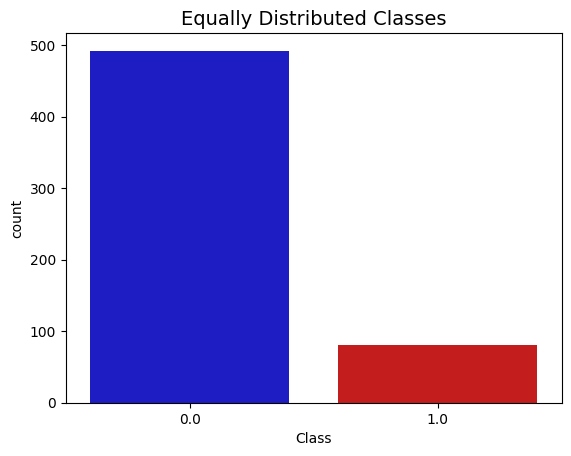

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


##Correlation Matrices

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

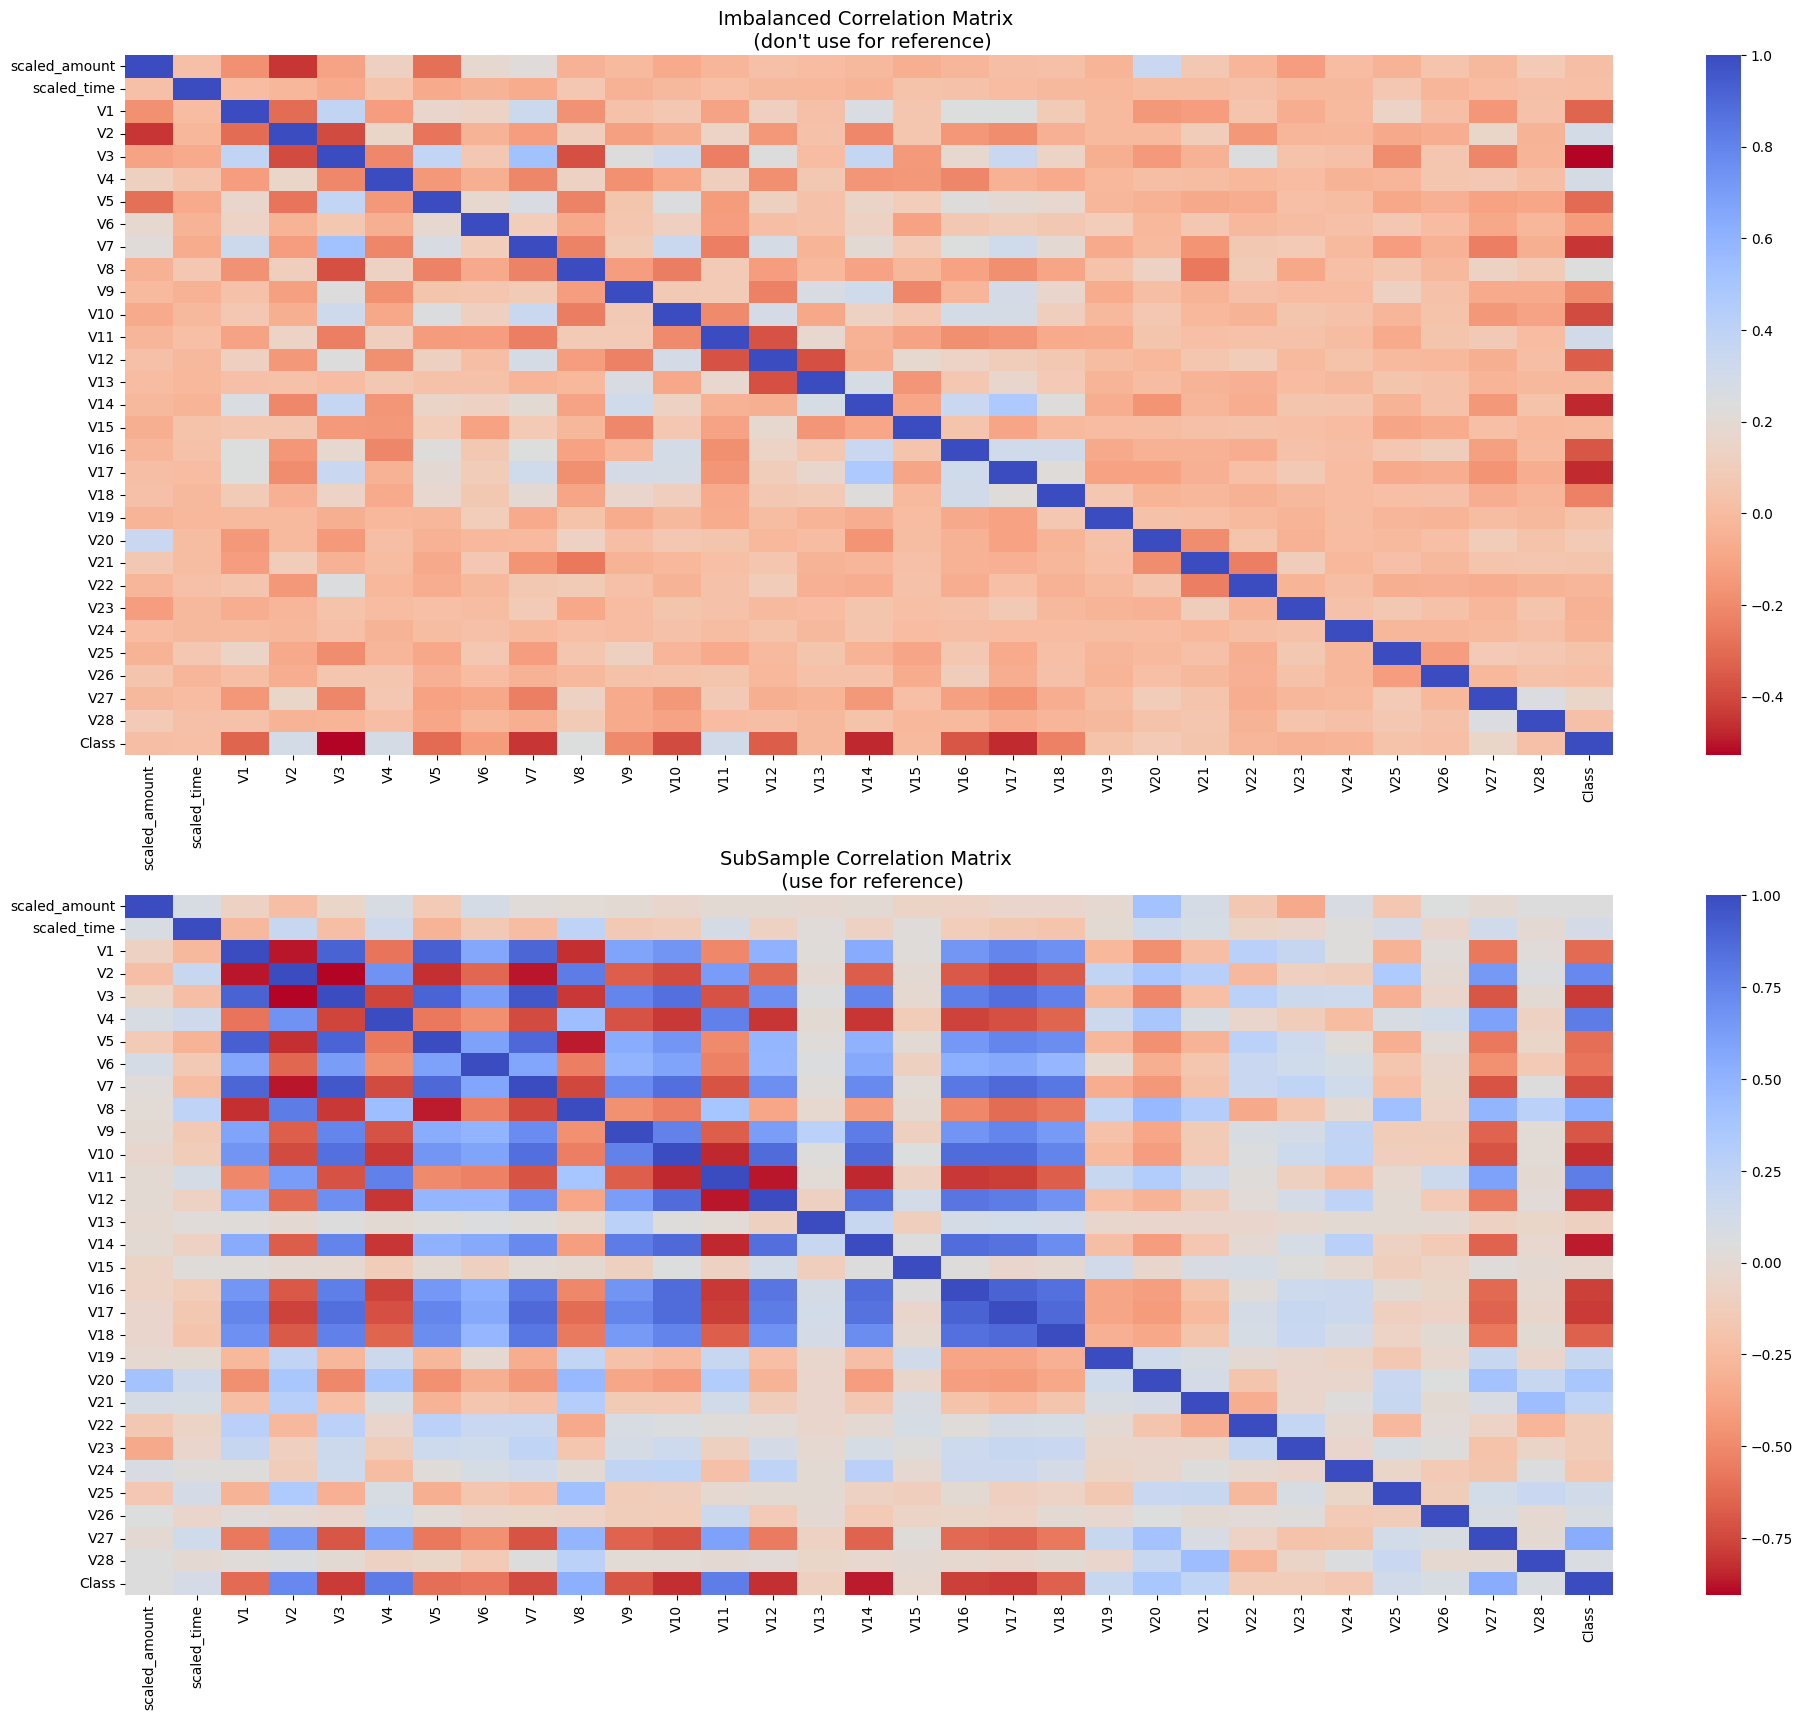

In [ ]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

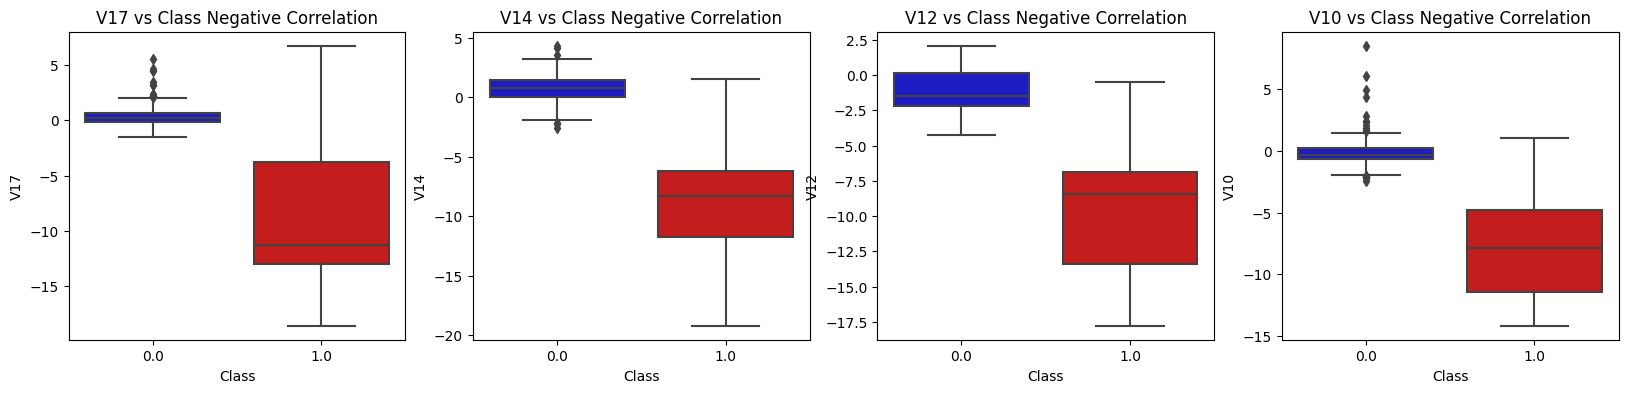

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

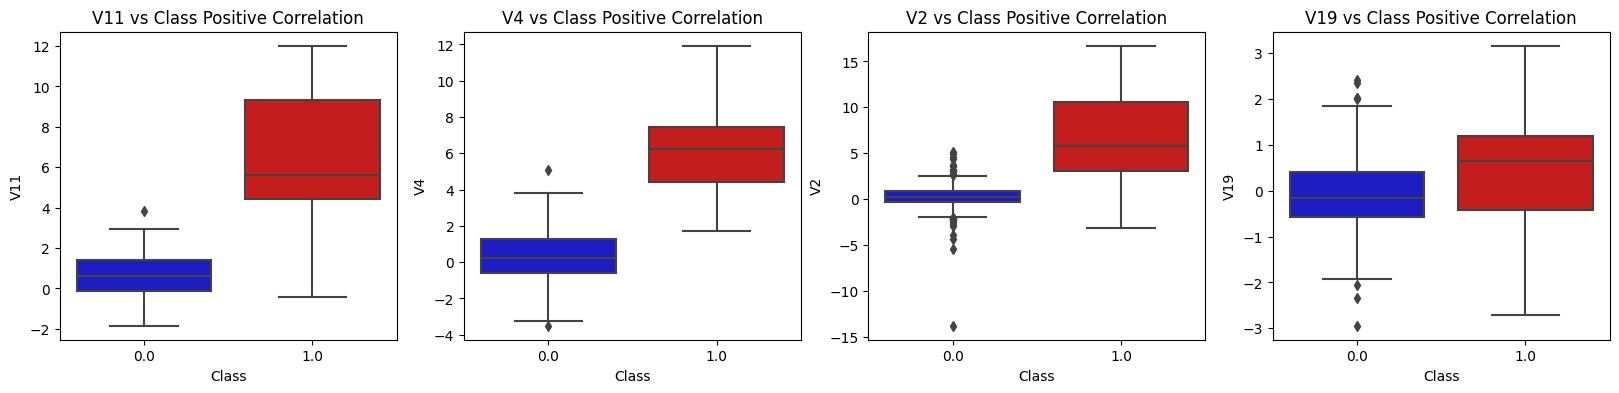

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

###Anomaly Detection

Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our model.


Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.

Determining the threshold: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).

Conditional Dropping: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.

Boxplot Representation: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

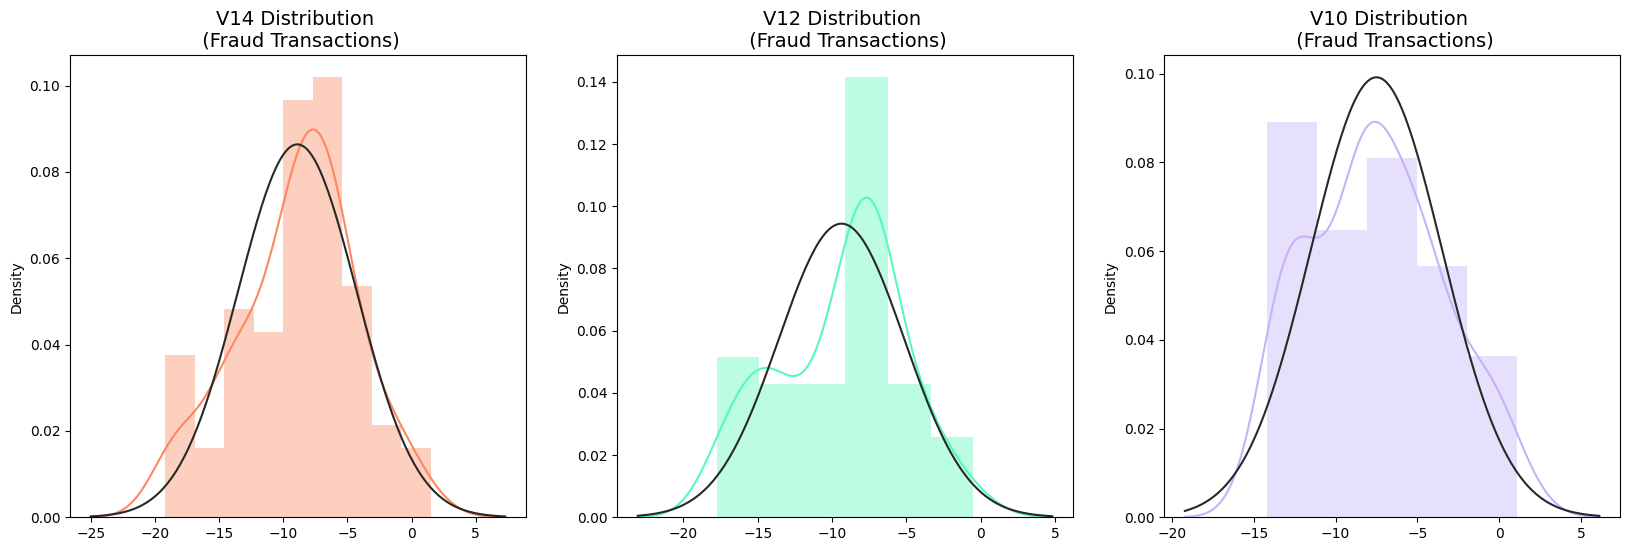

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [ ]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -11.7367291212569 | Quartile 75: -6.21025774661028
iqr: 5.52647137464662
Cut Off: 8.289707061969931
V14 Lower: -20.02643618322683
V14 Upper: 2.0794493153596516
Feature V14 Outliers for Fraud Cases: 0
V10 outliers:[]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -23.135385588803018
V12 Upper: 2.8846894908164984
V12 outliers: []
Feature V12 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 553
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -21.348671326982057
V10 Upper: 5.126582946544227
V10 outliers: []
Feature V10 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 551


In this code snippet, the focus is on removing outliers from specific features that exhibit a high negative correlation with the labels (fraud cases). The features in question are V14, V12, and V10. The process involves calculating the interquartile range (IQR) for each feature based on the fraud cases, determining a cut-off range, and identifying data points outside this range as outlier

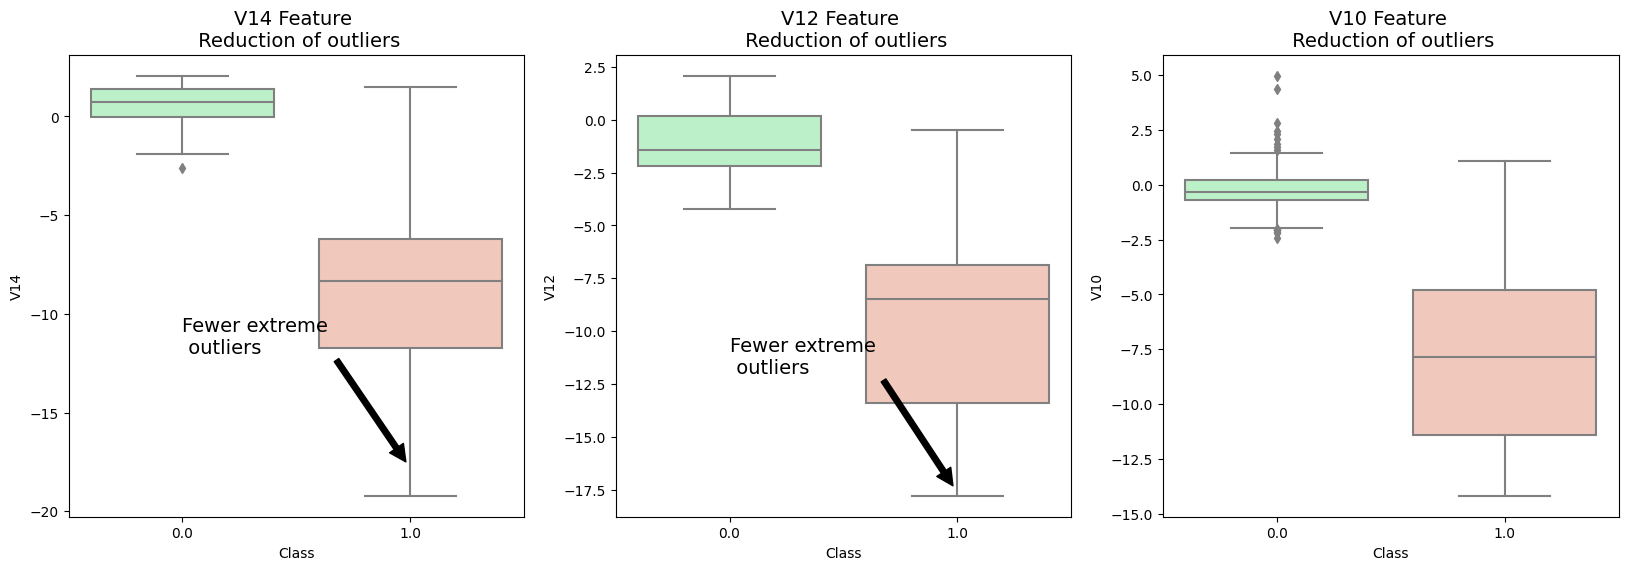

In [ ]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

##Dimensionality Reduction and Clustering:


In [ ]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 6.2 s
PCA took 0.012 s
Truncated SVD took 0.011 s


t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.

Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario (I shuffle the dataset before running t-SNE)
This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases.

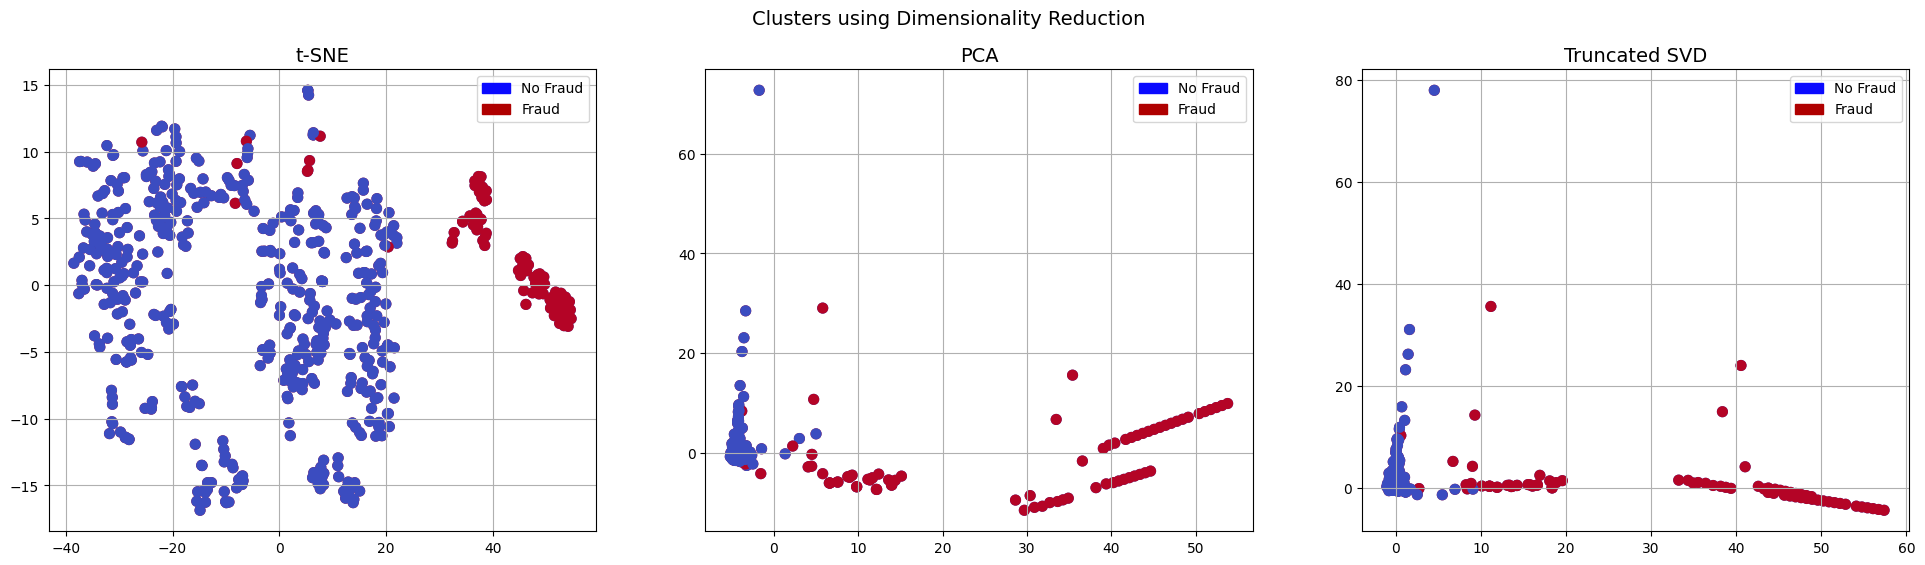

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

This code generates a multi-plot visualization comparing the clustering performance of three dimensionality reduction techniques—t-SNE, PCA, and Truncated SVD—on a dataset with two classes: "No Fraud" and "Fraud." The reduced representations of the dataset using each technique are visualized in separate subplots. The t-SNE scatter plot, PCA scatter plot, and Truncated SVD scatter plot depict data points colored based on their class labels, with "No Fraud" in blue and "Fraud" in red.

##Classifiers (UnderSampling):

In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [ ]:

from sklearn.ensemble import RandomForestClassifier
import collections

In [ ]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier()
   }

This code snippet defines a set of classifiers for a binary classification task, specifically addressing the issue of imbalanced class distribution through undersampling. The dataset, represented by X and y, consists of features and corresponding class labels ('Class'), with '0' indicating non-fraudulent transactions and '1' indicating fraudulent transactions. The classifiers included are intended for use after undersampling the majority class to mitigate class imbalance. The LogisticRegression classifier from scikit-learn is instantiated and added to the classifiers dictionary under the key "LogisticRegression." The purpose is to evaluate the performance of these classifiers on the undersampled dataset, considering logistic regression as one of the classification algorithms.

In [ ]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 98.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 99.0 % accuracy score


his code snippet evaluates the performance of the classifiers defined earlier using cross-validation. It employs the scikit-learn library's cross_val_score function to assess each classifier's accuracy on the training data. The loop iterates through the classifiers in the dictionary, fits each classifier to the training data (X_train and y_train), and calculates the training score using 5-fold cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# Random Forest Classifier
rf_params = {"n_estimators": [10, 50, 100, 200], "max_depth": [None, 10, 20, 30],
             "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)
rf_clf = grid_rf.best_estimator_

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

# Assuming you have defined X_train and y_train earlier

log_reg = LogisticRegression()

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

# Random Forest Classifier
rf_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
print('Random Forest Classifier Cross Validation Score: ', round(rf_score.mean() * 100, 2).astype(str) + '%')




Logistic Regression Cross Validation Score:  98.41%
Random Forest Classifier Cross Validation Score:  98.64%


This code performs cross-validation to evaluate the Logistic Regression classifier's performance on the training data. It uses scikit-learn's cross_val_score to calculate the cross-validated accuracy of the Logistic Regression model. The result is printed, showing the mean cross-validated score in percentage form.



Afterward, the code utilizes GridSearchCV, another scikit-learn tool, to perform a search for the best hyperparameters for Logistic Regression. The hyperparameter grid includes choices for the penalty term and regularization strength (C). The best estimator (Logistic Regression model with optimal parameters) is obtained using grid_log_reg.best_estimator_.



In [ ]:
# Assuming you have defined log_reg, original_Xtrain, original_ytrain, sss

# We will undersample during cross-validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

    # Check the distribution of classes in the test set
    print("Test set class distribution:", Counter(undersample_ytest))

    undersample_Xtrain = undersample_Xtrain.values
    undersample_Xtest = undersample_Xtest.values
    undersample_ytrain = undersample_ytrain.values
    undersample_ytest = undersample_ytest.values

    undersample_accuracy = []
    undersample_precision = []
    undersample_recall = []
    undersample_f1 = []
    undersample_auc = []

    # Implementing NearMiss Technique
    # Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
    X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
    print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

    # Cross Validating the right way
    for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
        undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
        undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
        undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

        undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
        undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
        undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
        undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))

        # Check if both classes are present in the test set before calculating ROC AUC
        unique_classes_test = np.unique(original_ytrain[test])
        if len(unique_classes_test) > 1:
            undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))
        else:
            print("Skipping ROC AUC calculation as only one class is present in the test set.")


Train: [ 3507  3585  3586 ... 17914 17915 17916] Test: [   0    1    2 ... 3582 3583 3584]
Test set class distribution: Counter({0.0: 3568, 1.0: 16})
NearMiss Label Distribution: Counter({0.0: 81, 1.0: 81})
Train: [    0     1     2 ... 17914 17915 17916] Test: [3507 3585 3586 ... 7165 7457 7468]
Test set class distribution: Counter({0.0: 3567, 1.0: 17})
NearMiss Label Distribution: Counter({0.0: 81, 1.0: 81})
Train: [    0     1     2 ... 17914 17915 17916] Test: [ 7166  7167  7168 ... 10943 11512 11567]
Test set class distribution: Counter({0.0: 3567, 1.0: 16})
NearMiss Label Distribution: Counter({0.0: 81, 1.0: 81})
Train: [    0     1     2 ... 17914 17915 17916] Test: [10748 10749 10750 ... 14576 14591 14617]
Test set class distribution: Counter({0.0: 3567, 1.0: 16})
NearMiss Label Distribution: Counter({0.0: 81, 1.0: 81})
Train: [    0     1     2 ... 14576 14591 14617] Test: [14331 14332 14333 ... 17914 17915 17916]
Test set class distribution: Counter({0.0: 3567, 1.0: 16})
Near


This code part is performing model evaluation using the NearMiss technique for undersampling during cross-validation. It uses scikit-learn's StratifiedShuffleSplit (sss) to split the dataset into training and test sets multiple times. In each iteration, it applies NearMiss to balance the class distribution in the training set, trains a logistic regression model (log_reg) using the undersampled data, and evaluates its performance metrics, including accuracy, precision, recall, and F1 score. Additionally, it checks if both classes are present in the test set before calculating the ROC AUC score to ensure the metric's applicability. The results are stored in lists (undersample_accuracy, undersample_precision, etc.), providing insights into how well the logistic regression model performs under the NearMiss undersampling technique.

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # First Estimator (Logistic Regression)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator (Random Forest)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Random Forest Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    return plt


In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, rf_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)


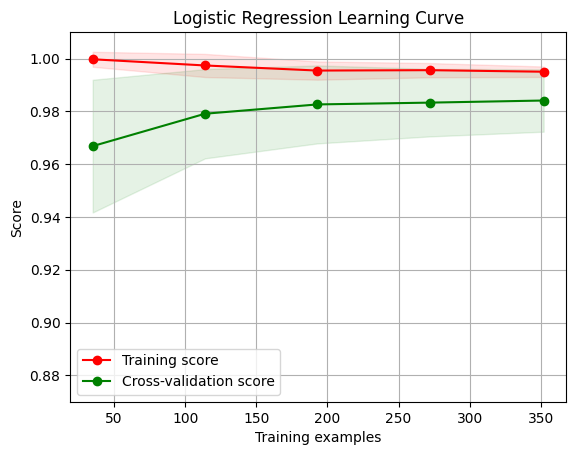

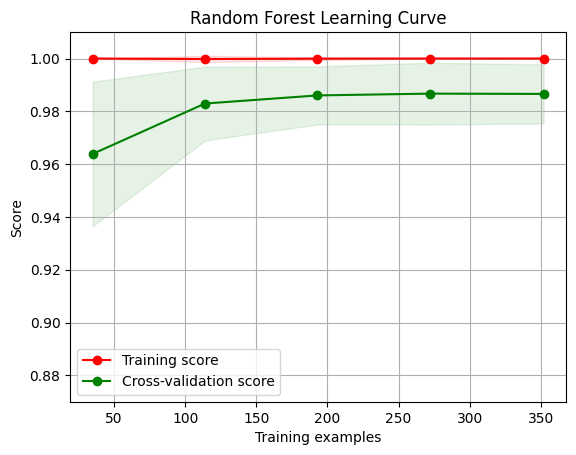

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, 'Logistic Regression Learning Curve', X_train, y_train, ylim=(0.87, 1.01), cv=cv, n_jobs=4)
plt.show()

# Random Forest Learning Curve
plot_learning_curve(rf_clf, 'Random Forest Learning Curve', X_train, y_train, ylim=(0.87, 1.01), cv=cv, n_jobs=4)
plt.show()


This code defines a function plot_learning_curve that generates a learning curve for a given estimator (machine learning model). The learning curve visually represents how the model's performance (score) changes with the number of training examples. The function uses the learning_curve function from scikit-learn to compute training and cross-validation scores at different training set sizes.

In the provided example, the function is used to plot the learning curve for a logistic regression model (log_reg) using a shuffle-split cross-validation with 100 splits. The y-axis limits are set to (0.87, 1.01), and the plot is displayed using plt.show().

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are already defined

# Logistic Regression
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                                method="decision_function")

# Random Forest Classifier
rf_clf = RandomForestClassifier()  # You can adjust the parameters
rf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5,
                            method="predict_proba")
rf_pred = rf_pred[:, 1]  # Use the probability of the positive class

# Now you can use log_reg_pred and rf_pred as needed


This code uses scikit-learn's cross_val_predict function to generate cross-validated predictions for the training data (X_train and y_train) using a logistic regression model (log_reg). The method used for prediction is "decision_function," which returns the decision function values rather than the predicted classes. The decision function represents the distance of each sample to the decision boundary and can be used to compute various metrics like ROC curves.



In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming log_reg_pred and rf_pred are already defined

# Logistic Regression
log_reg_auc = roc_auc_score(y_train, log_reg_pred)
print('Logistic Regression: ', log_reg_auc)

# Random Forest Classifier
rf_auc = roc_auc_score(y_train, rf_pred)
print('Random Forest: ', rf_auc)


Logistic Regression:  0.9856348285382738
Random Forest:  0.9866351886679204


In [ ]:
from sklearn.metrics import precision_recall_curve

# Assuming log_reg_pred and rf_pred are already defined

# Precision-Recall Curve for Logistic Regression
precision_logreg, recall_logreg, threshold_logreg = precision_recall_curve(y_train, log_reg_pred)

# Precision-Recall Curve for Random Forest Classifier
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_train, rf_pred)


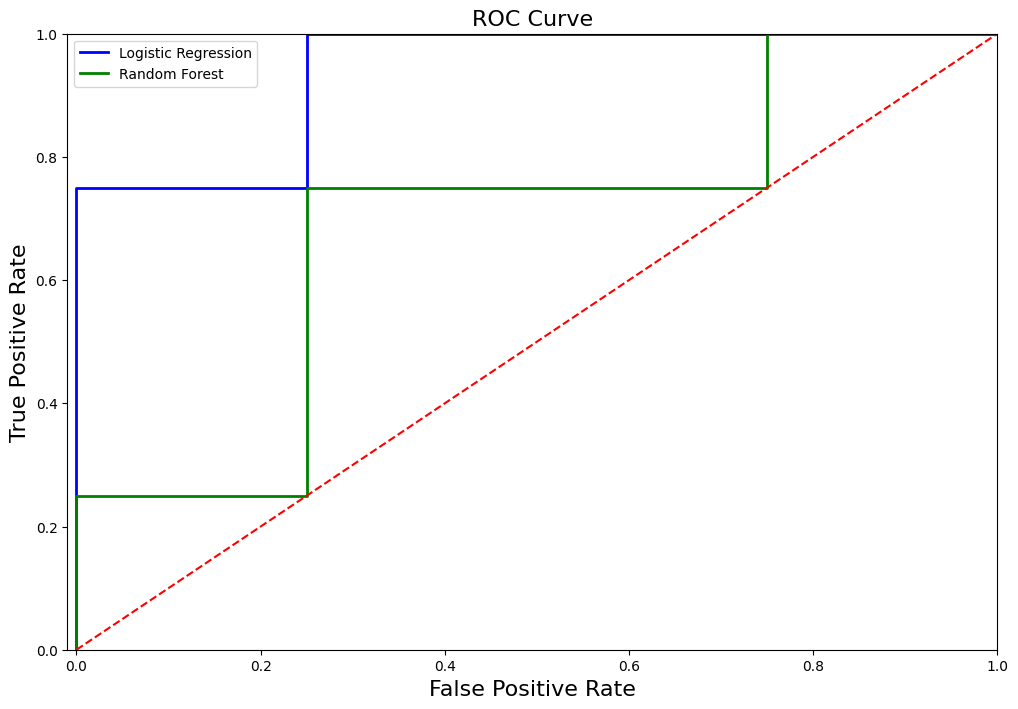

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Sample data for demonstration
y_true = [0, 1, 0, 1, 1, 1, 0, 0]
log_reg_scores = [0.1, 0.4, 0.2, 0.7, 0.9, 0.8, 0.3, 0.5]
rf_scores = [0.2, 0.3, 0.4, 0.6, 0.7, 0.9, 0.5, 0.8]

log_reg_fpr, log_reg_tpr, _ = roc_curve(y_true, log_reg_scores)
rf_fpr, rf_tpr, _ = roc_curve(y_true, rf_scores)

def plot_roc_curve(log_reg_fpr, log_reg_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(12, 8))
    plt.title('ROC Curve', fontsize=16)
    plt.plot(log_reg_fpr, log_reg_tpr, 'b-', label='Logistic Regression', linewidth=2)
    plt.plot(rf_fpr, rf_tpr, 'g-', label='Random Forest', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    plt.axis([-0.01, 1, 0, 1])

plot_roc_curve(log_reg_fpr, log_reg_tpr, rf_fpr, rf_tpr)
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.91
Precision Score: 0.82
F1 Score: 0.87
Accuracy Score: 0.96
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.95
Precision Score: 0.01
Recall Score: 0.07
F1 Score: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


This code evaluates the performance of a logistic regression model on the training data (X_train and y_train). It calculates and prints several metrics related to overfitting:

Recall Score: The proportion of actual positive instances correctly predicted by the model.

Precision Score: The proportion of predicted positive instances that are actually positive.

F1 Score: The harmonic mean of precision and recall, providing a balance between the two metrics.

Accuracy Score: The overall accuracy of the model in predicting both positive and negative instances.

The code then compares these overfitting metrics to the expected values, which are calculated using the mean values of metrics obtained during undersampling. This helps in assessing the model's generalization performance and whether it is prone to overfitting. The underscores (---) are used for visual separation in the printed output.

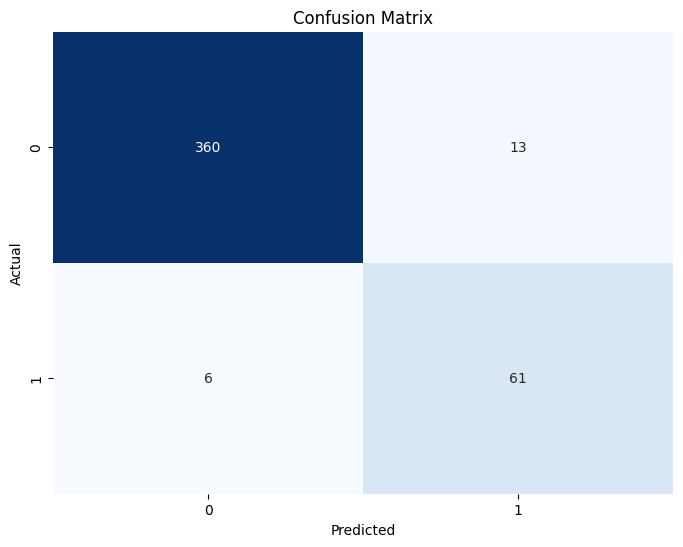

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the logistic regression model and have predictions
y_pred = log_reg.predict(X_train)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Certainly! This code is for creating and visualizing a confusion matrix for a logistic regression model. The confusion matrix is a table that summarizes the performance of a classification algorithm. In this case, it shows the counts of true positive, true negative, false positive, and false negative predictions made by the logistic regression model on the training data (X_train and y_train).

The confusion_matrix function from scikit-learn is used to calculate these counts. The resulting confusion matrix is then visualized using seaborn and matplotlib to create a heatmap, making it easier to interpret the distribution of predictions. The heatmap helps to identify how well the logistic regression model is performing in terms of classifying instances into different categories (e.g., fraud or non-fraud).